In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob1880.txt'
df=pd.read_csv(url, sep=',')
df.columns = ['name','sex', 'quantity']
df['year'] = 1880;
df['cumsum'] = df['quantity'].cumsum()
df.to_csv('1.csv')

In [38]:
i = 1881
years = [1880]
while i <= 2010:
    url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/babynames/yob'+ str(i) +'.txt'
    df=pd.read_csv(url, sep=',')
    df.columns = ['name','sex', 'quantity']
    df['year'] = i;
    df['cumsum'] = df['quantity'].cumsum()
    with open('1.csv','r') as infile:
        df.to_csv('1.csv',mode='a',header=False)
    years.append(i)
    i += 1



In [84]:
df_all = pd.read_csv('1.csv', sep=',')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690653 entries, 0 to 1690652
Data columns (total 6 columns):
Unnamed: 0    1690653 non-null int64
name          1690653 non-null object
sex           1690653 non-null object
quantity      1690653 non-null int64
year          1690653 non-null int64
cumsum        1690653 non-null int64
dtypes: int64(4), object(2)
memory usage: 77.4+ MB


Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов


In [85]:
df_all.groupby(['year', 'sex'])['quantity'].sum()

year  sex
1880  F        83928
      M       110493
1881  F        85036
      M       100748
1882  F        99702
      M       113687
1883  F       104310
      M       104632
1884  F       119804
      M       114445
1885  F       123928
      M       107802
1886  F       134647
      M       110785
1887  F       136095
      M       101412
1888  F       166877
      M       120857
1889  F       166720
      M       110590
1890  F       178299
      M       111026
1891  F       173782
      M       101198
1892  F       199176
      M       122038
1893  F       200124
      M       112319
1894  F       209772
      M       115775
              ...   
1996  F      1726537
      M      1892700
1997  F      1713601
      M      1883571
1998  F      1739216
      M      1909676
1999  F      1745605
      M      1918267
2000  F      1788011
      M      1961702
2001  F      1773236
      M      1940498
2002  F      1769908
      M      1938941
2003  F      1798728
      M      1972439
200

In [87]:
M = df_all[df_all.sex == 'M'].groupby(['year', 'sex']).agg({'quantity':sum})/10000
F = df_all[df_all.sex == 'F'].groupby(['year', 'sex']).agg({'quantity':sum})/10000
data = np.column_stack((M, F))

MF = pd.merge(M, F, on='year')


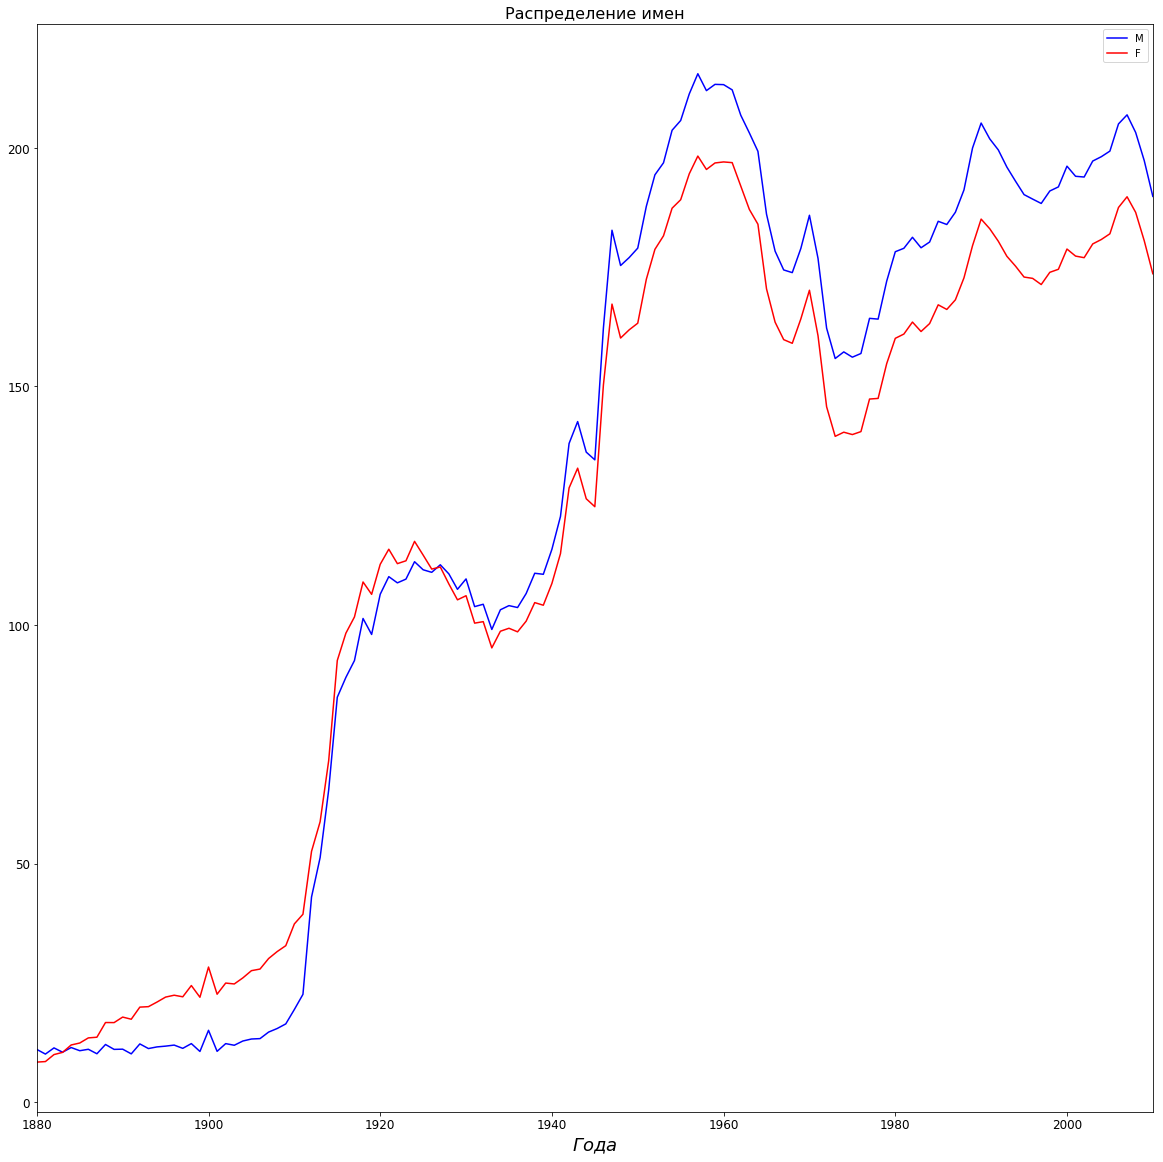

In [90]:
plt.figure(figsize=(20,20))
plt.plot( MF.index, MF['quantity_x'], "b-")
plt.plot( MF.index, MF['quantity_y'], "r-")
plt.legend(['M', 'F'])
plt.xlim(1880,2010,5)
plt.xlabel("$Года$", fontsize=18)
plt.title(r"Распределение имен", fontsize=16)
plt.show()




In [10]:
df_all['quantity'].sum()
df_all.groupby(['name'])['quantity'].sum()


name
Aaron        1844
Ab             21
Abb            16
Abbie        2189
Abbott         11
Abby          128
Abe          1003
Abel          240
Abelina         5
Abie           10
Abigail       275
Abner         492
Abraham      1725
Abram         427
Abron           5
Ace            99
Acey            5
Achsa          12
Achsah         12
Acie           55
Acy            17
Ad              5
Ada         19974
Adabelle        5
Adah          798
Adalene         5
Adalia          5
Adaline       406
Adam         1994
Adams           7
            ...  
Zeola           9
Zepha          12
Zera           54
Zeta           72
Zetta         340
Zettie        205
Zilda          11
Zilla          70
Zillah        101
Zillie          7
Zilpah          9
Zilpha        162
Zilphia        11
Zimmie          5
Zina           96
Zita          179
Zoa           148
Zoe           630
Zola          628
Zollie         92
Zona          485
Zonie          16
Zora         1145
Zorah           5
Zudie

Найдите самые популярные имена за всю историю

In [7]:
df_all.groupby(['name']).agg({'quantity':sum}).sort_values(['quantity'],ascending=False).head(5)


,quantity
name,
John,181469
William,166489
James,112617
Anna,99919
George,97128


Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время


In [74]:
 import numpy as np

In [75]:
min_ = df_all['year'].min()
step = (df_all['year'].max() - min_ )/10
df_all['year'].astype(int)
df_all.insert(len(df_all.columns), 'period', np.ceil((df_all.year - min_)/step))


In [77]:
df_all.groupby(['period','name', 'sex']).agg({'quantity':sum})



quantity
period name      sex          
0.0    Aaron     M         187
       Abbie     F          77
       Abbott    M           8
       Abby      F          13
       Abe       M          94
       Abel      M          30
       Abigail   F          18
       Abner     M          15
       Abraham   M         292
       Abram     M          21
       Ace       M           7
       Achille   M           5
       Acie      M          17
       Ada       F         939
       Adabelle  F           7
       Adah      F          26
       Adalene   F           5
       Adaline   F          25
       Adam      M         189
       Adda      F          10
       Addie     F         497
                 M          10
       Addis     F           5
       Addison   M          20
       Adel      F           8
       Adela     F          63
       Adelaida  F           6
       Adelaide  F         223
       Adelard   M           6
       Adelbert  M          16
...                        ...
10.0   Zyree     F          11
                 M          30
       Zyreion   M           5
       Zyrek     M           5
       Zyrell    M          56
       Zyren     M          37
       Zyreon    M           7
       Zyrese    M           5
       Zyrhiana  F           6
       Zyria     F         214
       Zyriah    F         193
       Zyrian    M          10
       Zyriana   F          17
       Zyrianna  F          18
       Zyrie     F           5
       Zyriel    F           5
       Zyrihanna F          29
       Zyrion    M          45
       Zyriyah   F           6
       Zyron     M          92
       Zyrus     M          28
       Zysean    M           5
       Zyshaun   M          23
       Zyshawn   M          86
       Zyshon    M          11
       Zyshonne  M          28
       Zytavious M          43
       Zyvion    M           5
       Zyyanna   F           6
       Zzyzx     M           5

[297460 rows x 1 columns]

In [78]:
df_goup = df_all.groupby(['period', 'sex']).agg({'quantity':max})
df_goup

quantity
period sex          
0.0    F       11799
       M       13445
1.0    F       36646
       M       56911
2.0    F       40005
       M       62108
3.0    F       42343
       M       62454
4.0    F       71654
       M       94601
5.0    F       65699
       M       92700
6.0    F       43488
       M       86898
7.0    F       35817
       M       77579
8.0    F       54826
       M       68713
9.0    F       43396
       M       60780
10.0   F       22690
       M       32509

In [81]:
df_polular = df_all.loc[df_all['quantity'].isin(df_goup.quantity)]
df_polular

,Unnamed: 0,name,sex,quantity,year,cumsum,period
93542,0,Helen,F,11799,1911,11799,0.0
96409,2867,John,M,13445,1911,407240,0.0
169421,0,Dorothy,F,36646,1920,36646,1.0
175184,5763,John,M,56911,1920,1184151,1.0
212439,0,Dorothy,F,40005,1924,40005,2.0
280023,5248,Robert,M,62108,1930,1123519,2.0
321400,0,Shirley,F,42343,1935,42343,3.0
371225,5021,James,M,62454,1940,1149532,3.0
430955,0,Mary,F,71654,1947,71654,4.0
437057,6102,James,M,94601,1947,1767196,4.0


In [82]:
df_ = df_all.loc[df_all['name'].isin(['Robert'])]
Robert = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['John'])]
John = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['Dorothy'])]
Dorothy = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['Helen'])]
Helen = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000
df_ = df_all.loc[df_all['name'].isin(['James'])]
James = df_.groupby(['name', 'period']).agg({'quantity':sum})/1000



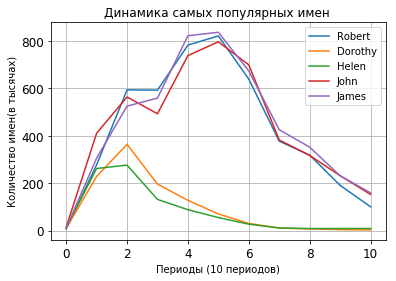

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0, 11, 1)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, Robert.quantity, label='Robert')
ax.plot(t, Dorothy.quantity, label='Dorothy')
ax.plot(t, Helen.quantity, label='Helen')
ax.plot(t, John.quantity, label='John')
ax.plot(t, James.quantity, label='James')

ax.set(xlabel='Периоды (10 периодов)', ylabel='Количество имен(в тысячах)',
       title='Динамика самых популярных имен ')
ax.grid()
plt.legend()
fig.savefig("test.png")
plt.show()


Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени


In [129]:
df_sliced = df_all[df_all.year.isin(['1880', '1890', '1900', '1895'])]

df_1880 = df_all.loc[df_all['year'].isin(['1880'])]
df_1880 = df_1880.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

df_1890 = df_all.loc[df_all['year'].isin(['1890'])]
df_1890 = df_1890.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

df_1895 = df_all.loc[df_all['year'].isin(['1895'])]
df_1895 = df_1895.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

df_1900 = df_all.loc[df_all['year'].isin(['1900'])]
df_1900 = df_1900.groupby([ df_all['name'].str.slice(0,1)]).agg({'quantity':sum})/1000

data = pd.merge(df_1880,df_1890,  on='name')
data = pd.merge(data,df_1895,  on='name')
data = pd.merge(data,df_1900,  on='name')
data.columns = ['1880', '1890', '1895', '1900']


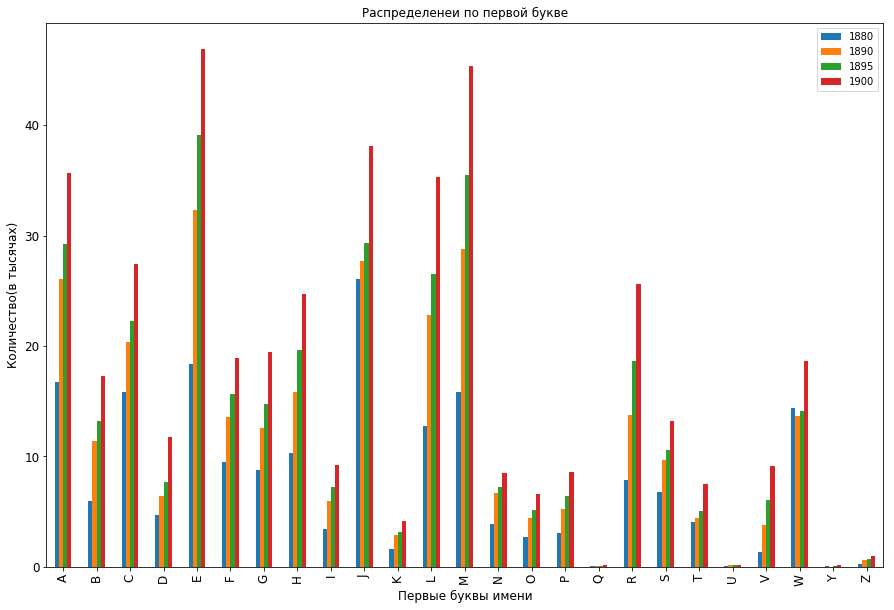

In [132]:

ax = data[['1880', '1890', '1895', '1900']].plot(kind='bar', title ="Распределенеи по первой букве", figsize=(15, 10), legend=True, fontsize=12)

ax.set_xlabel("Первые буквы имени", fontsize=12)
ax.set_ylabel("Количество(в тысячах)", fontsize=12)
ax.set_xticklabels(data.index.tolist(), rotation=90)
ax.legend(['1880', '1890', '1895', '1900'])
plt.show()






In [247]:
df_sliced = df_all[df_all.year.isin(['1880', '1890', '1900', '1895'])]
df_sliced.groupby(['year',df_all['name'].str.slice(-1)])['quantity'].count()


year  name
1880  a        450
      b          7
      c          7
      d         93
      e        490
      f          7
      g          9
      h         60
      i          7
      k         21
      l         98
      m         30
      n        223
      o         35
      p          4
      r         89
      s        125
      t         76
      u          5
      v          1
      w          7
      x          4
      y        147
      z          4
1890  a        688
      b          9
      c          9
      d        113
      e        721
      f          5
              ... 
1895  u          4
      v          1
      w          8
      x          6
      y        213
      z          6
1900  a        995
      b          7
      c          8
      d        139
      e       1023
      f          6
      g         15
      h         90
      i         11
      k         22
      l        183
      m         30
      n        343
      o         76
      p          7
 

In [246]:
df_all['name'].str.slice(-1).head(7)

0    a
1    a
2    h
3    e
4    t
5    a
6    e
Name: name, dtype: object

Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)


In [105]:
df_half = df_all.groupby(['year']).agg({'quantity':sum})/2


In [117]:
tt = df_all.groupby(['year','name']).agg({'quantity':sum, 'cumsum' :sum }).sort_values(['year', 'quantity','cumsum'],ascending=[True,False, False])


In [124]:
data = pd.merge(tt, df_half, on='year')
data.columns = ['quantity', 'cumsum', 'total']
data = data[data['cumsum'] <= data['total']]
data = data.groupby(['year']).count()



pandas.core.frame.DataFrame

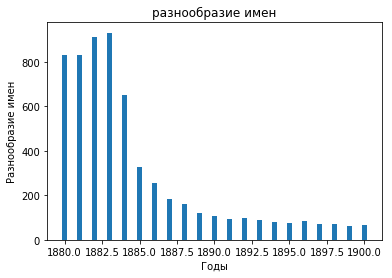

In [130]:
from matplotlib import pyplot as plt


plt.bar(data.index,data.quantity,width=.3)

plt.xlabel('Годы')
plt.ylabel('Разнообразие имен')
plt.title('разнообразие имен')
plt.show()

In [30]:
df_all['name'].unique()
df_goup = df_all.groupby(['name', 'sex']).agg({'quantity':sum}).sort_values(['quantity'],ascending=False)
df_goup.head(10)


,,quantity
name,sex,
John,M,180452
William,M,165706
James,M,112027
Anna,F,99534
George,M,96415
Charles,M,87608
Margaret,F,65044
Frank,M,63162
Elizabeth,F,62984


In [60]:
df_all = df_all[df_all.year > 1910]
df_ = df_all.loc[df_all['name'].isin(['Margaret'])]
Margaret = df_.groupby(['year']).agg({'quantity':sum})/1000

df_ = df_all.loc[df_all['name'].isin(['Elizabeth'])]
Elizabeth = df_.groupby(['year']).agg({'quantity':sum})/1000

df_ = df_all.loc[df_all['name'].isin(['Arnold'])]
Arnold = df_.groupby(['year']).agg({'quantity':sum})/1000


df_ = df_all.loc[df_all['name'].isin(['Marilyn'])]
Marilyn  = df_.groupby(['year']).agg({'quantity':sum})/1000

df_ = df_all.loc[df_all['name'].isin(['John'])]
John = df_.groupby(['year']).agg({'quantity':sum})/1000


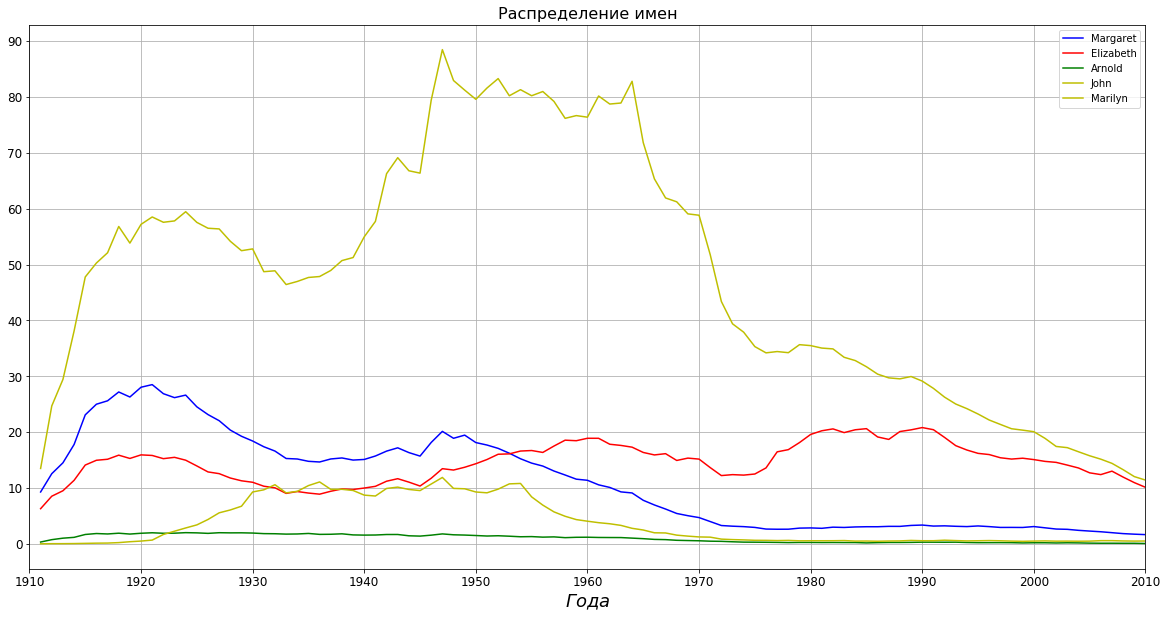

In [72]:
plt.figure(figsize=(20,10))
plt.locator_params(nbins=10)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.xlim(1910,2010,10)
plt.grid()
    
    
plt.plot( Margaret.index, Margaret['quantity'], "b-")
plt.plot( Elizabeth.index, Elizabeth['quantity'], "r-")
plt.plot( Arnold.index, Arnold['quantity'], "g-")
plt.plot( John.index, John['quantity'], "y-")
plt.plot( Marilyn.index, Marilyn['quantity'], "y-")
plt.legend(['Margaret', 'Elizabeth', 'Arnold','John','Marilyn'])

plt.xlabel("$Года$", fontsize=18)
plt.title(r"Распределение имен", fontsize=16)
plt.show()

Что я вижу по данным

arnold schwarzenegger - фильм Терминатор был очень популярен в 80х, но всплеска нет в этот период
John Lennon - Битлз были поулярны по всему миру, но всплеск есть в 50х годах  
Marilyn Monroe (1926-1962) - была популярной актрисой и символом красоты, по ней похоже есть всплеск

Вот, например,по данным очень популярны имена Вильям, Джорж, Джеймс и есть попярные личности с этими именами
Но они жили и были популярны до 1880, те всплеск должен был быть до начала наших данных. И возможно в честь них много и называли
william shakespeare
George Washington (April 30, 1789 – March 4, 1797)
James K. Polk (March 4, 1845 – March 4, 1849)

Вот эти имена дают рост  
margaret mitchell (1900-1949)
Elizabeth Taylor (1932-2011)